## The Sparks Foundation
### Name: Odufuwa Clinton Ajibola
### Internship program: Data science and Business Analytics tasks

### Task 2: Prediction using Unsupervised learning (K means clustering)

In [8]:
#importing modules to be used
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [9]:
#reading in the data
data = pd.read_csv('iris.csv')

In [10]:
#loading the iris datasets from sklearn.datsets library
iris_data = datasets.load_iris()

In [11]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
#generating a random sample of values in the iris dataset
data.sample(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5,5.0,3.6,1.4,0.2,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
122,123,7.7,2.8,6.7,2.0,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [13]:
#reanming column names in the iris dataset
data.rename(columns = {'SepalLengthCm': 'SepalLength(cm)', 'SepalWidthCm': 'SepalWidth(cm)',
             'PetalLengthCm': 'PetalLength(cm)', 'PetalWidthCm': 'PetalWidth(cm)'}, inplace=True)

In [14]:
data.head()

,Id,SepalLength(cm),SepalWidth(cm),PetalLength(cm),PetalWidth(cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
#Finding the optimum number of clusters for k-means classification
x = data.iloc[:20, 0:4].values
x

array([[ 1. ,  5.1,  3.5,  1.4],
       [ 2. ,  4.9,  3. ,  1.4],
       [ 3. ,  4.7,  3.2,  1.3],
       [ 4. ,  4.6,  3.1,  1.5],
       [ 5. ,  5. ,  3.6,  1.4],
       [ 6. ,  5.4,  3.9,  1.7],
       [ 7. ,  4.6,  3.4,  1.4],
       [ 8. ,  5. ,  3.4,  1.5],
       [ 9. ,  4.4,  2.9,  1.4],
       [10. ,  4.9,  3.1,  1.5],
       [11. ,  5.4,  3.7,  1.5],
       [12. ,  4.8,  3.4,  1.6],
       [13. ,  4.8,  3. ,  1.4],
       [14. ,  4.3,  3. ,  1.1],
       [15. ,  5.8,  4. ,  1.2],
       [16. ,  5.7,  4.4,  1.5],
       [17. ,  5.4,  3.9,  1.3],
       [18. ,  5.1,  3.5,  1.4],
       [19. ,  5.7,  3.8,  1.7],
       [20. ,  5.1,  3.8,  1.5]])

In [18]:
#wcss- within cluster sum of squares
wcss = []

for i in range(1, 11):
    kmeans_model = KMeans(n_clusters = i, init="k-means++", n_init = 7, max_iter = 300)
    kmeans_model.fit(x)
    wcss.append(kmeans_model.inertia_)

C:\Users\clinton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


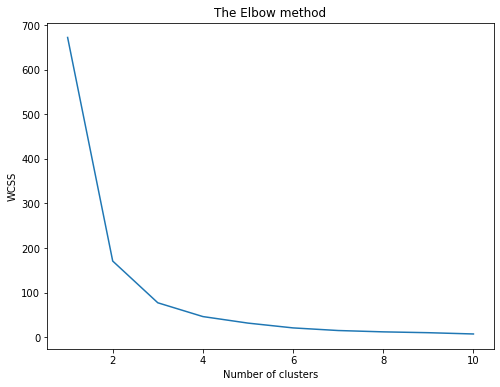

In [19]:
#Visualizing the k-means Elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

> Note: Elbow method - The elbow method describes the sharp increase in the ratio of accuracy after multiple clustering runs and an increase in K(clusters) in each run..
Looking closely at the visualization above, we can observe that the elbow curve becomes significant from point '3'.
From this, we will choose the number of clusters as **3**

In [20]:
#building the model with n_clusters set to 3
model = KMeans(n_clusters = 3, init='k-means++', n_init= 10, max_iter=300)
model.fit(x)

KMeans(n_clusters=3)

In [22]:
kmeans_pred = model.predict(x)
kmeans_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

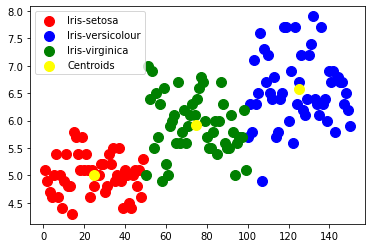

In [79]:
#Visualizing the clusters
plt.scatter(x[kmeans_pred == 0, 0], x[kmeans_pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[kmeans_pred == 1, 0], x[kmeans_pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[kmeans_pred == 2, 0], x[kmeans_pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], 
            s = 100, c = s'yellow', label = 'Centroids')

plt.legend()